

---


**Assignment 3** \\

\\

This assignment is done using PyTorch framework.
See the steps below. Load the data files properly. \\

*Name: Aditya Khopkar* \\
*UID: 116911627*


---



---



**Step 1 : Import all the necessary Libraries**

In [0]:
import torch
import torchvision
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

**Step 2. Create a Neural Network class** \\
A feed forward network in pytorch, autograd feature ON
LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT

In [0]:
'''
Create a neural network class -> Feed forward network
LINEAR -> RELU -> LINEAR -> SIGMOID -> OUTPUT
'''


class NeuralNet(nn.Module):
  def __init__(self,n_x,n_h,n_y):
    super(NeuralNet,self).__init__()
    self.fc1 = nn.Linear(n_x, n_h) 
    self.fc2 = nn.Linear(n_h, n_y) 
  
  def forward(self,x):
    out = self.fc1(x)
    out = torch.relu(out)
    out = self.fc2(out)
    out = torch.sigmoid(out)
    return out

NameError: ignored

**Step 3: Load Image Dataset**

In [0]:
def load_data(train_file, test_file):
    # Load the training data
    train_dataset = h5py.File(train_file,'r')
    
    # Separate features(x) and labels(y) for training set
    train_set_x_orig = np.array(train_dataset["train_set_x"])
    train_set_y_orig = np.array(train_dataset["train_set_y"])

    # Load the test data
    test_dataset = h5py.File(test_file,'r')
    
    # Separate features(x) and labels(y) for training set
    test_set_x_orig = np.array(test_dataset["test_set_x"])
    test_set_y_orig = np.array(test_dataset["test_set_y"])

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [0]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
train_file="train_catvnoncat.h5"
test_file="test_catvnoncat.h5"
train_x_orig, train_y, test_x_orig, test_y, classes = load_data(train_file, test_file)


y = 0. It's a non-cat picture.


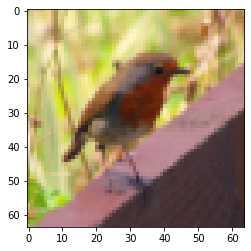

In [0]:
# Example of a picture
index = 10
plt.imshow(train_x_orig[index])
print ("y = " + str(train_y[0,index]) + ". It's a " + classes[train_y[0,index]].decode("utf-8") +  " picture.")

In [0]:
# Explore your dataset 
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))
print ("Each image is of size: (" + str(num_px) + ", " + str(num_px) + ", 3)")
print ("train_x_orig shape: " + str(train_x_orig.shape))
print ("train_y shape: " + str(train_y.shape))
print ("test_x_orig shape: " + str(test_x_orig.shape))
print ("test_y shape: " + str(test_y.shape))

Number of training examples: 209
Number of testing examples: 50
Each image is of size: (64, 64, 3)
train_x_orig shape: (209, 64, 64, 3)
train_y shape: (1, 209)
test_x_orig shape: (50, 64, 64, 3)
test_y shape: (1, 50)


**Step 4: Vectorize the image data**

In [0]:
# Reshape the training and test examples 
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

# Standardize data to have feature values between 0 and 1.
train_x = train_x_flatten/255.
test_x = test_x_flatten/255.

print ("train_x's shape: " + str(train_x.shape))
print ("test_x's shape: " + str(test_x.shape))



train_x's shape: (12288, 209)
test_x's shape: (12288, 50)


**Step 5: Convert the data to Torch** \\
The image data loaded is in numpy, which is not the right format for any pytorch functionality to work on it. Thus, we convert the data from numpy to torch

In [0]:
#Converting numpy dataset to torch

train_x = torch.from_numpy(np.array(train_x))
test_x = torch.from_numpy(np.array(test_x))
train_y = torch.from_numpy(np.array(train_y))
test_y = torch.from_numpy(np.array(test_y))

#print(train_x)
print ("Input train shape: " + str(train_x.size()))
print ("Output train shape: " + str(train_y.size()))

Input train shape: torch.Size([12288, 209])
Output train shape: torch.Size([1, 209])


**Step 6 : Initialize Model and parameters** \\
In this step, we initialize all the hyperparameters and parameters required to execute our model

In [0]:
'''
Initialization of model parameters and hyper-parameters
'''
n_x = train_x.shape[0]     # num_px * num_px * 3
n_h = 7
n_y = 1
learning_rate = 0.005
momentum = 0.9
weight_decay = 0.01
epochs = 8000

print('Model parameters are: input size {}, neurons {}, output {}'.format(n_x,n_h,n_y))

Model parameters are: input size 12288, neurons 7, output 1


In [0]:
# Create a neural network model

nn_model = NeuralNet(n_x,n_h,n_y)
loss_func = nn.BCELoss() #Defining the loss function: Cross Entropy Loss
optim = torch.optim.SGD(nn_model.parameters(), lr=learning_rate, momentum=momentum,weight_decay = weight_decay) #Create optimizer based on 'SGD'

print('Neural Net Structure: '+str(nn_model))


Neural Net Structure: NeuralNet(
  (fc1): Linear(in_features=12288, out_features=7, bias=True)
  (fc2): Linear(in_features=7, out_features=1, bias=True)
)


**Step 7: Train the data** \\
For given hyperparameter and model parameters, compute the loss after training the data

Epoch: 0, Training Loss: 0.7811467051506042
Epoch: 100, Training Loss: 0.3929159343242645
Epoch: 200, Training Loss: 0.23553112149238586
Epoch: 300, Training Loss: 0.16867490112781525
Epoch: 400, Training Loss: 0.1295095682144165
Epoch: 500, Training Loss: 0.09271581470966339
Epoch: 600, Training Loss: 0.07817304879426956
Epoch: 700, Training Loss: 0.06672204285860062
Epoch: 800, Training Loss: 0.05988045781850815
Epoch: 900, Training Loss: 0.05555910989642143
Epoch: 1000, Training Loss: 0.0544155053794384
Epoch: 1100, Training Loss: 0.05406450107693672
Epoch: 1200, Training Loss: 0.048260051757097244
Epoch: 1300, Training Loss: 0.04715915769338608
Epoch: 1400, Training Loss: 0.04401319846510887
Epoch: 1500, Training Loss: 0.04240509495139122
Epoch: 1600, Training Loss: 0.042705632746219635
Epoch: 1700, Training Loss: 0.04153025150299072
Epoch: 1800, Training Loss: 0.041508905589580536
Epoch: 1900, Training Loss: 0.0424659363925457
Epoch: 2000, Training Loss: 0.04019353538751602
Epoch:

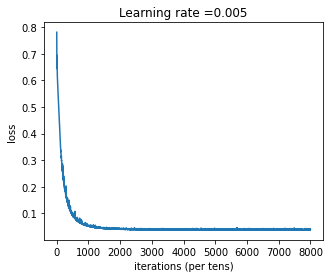

In [0]:
#Train data
X_img = train_x.T
Y_img = train_y.T

nn_model.train()

training_losses = []
for epoch in range(0,epochs):
  model_output = nn_model(X_img.float())
  loss = loss_func(model_output,Y_img.float())
  training_losses.append(loss)

  optim.zero_grad()
  loss.backward()
  optim.step()
  if epoch%100==0:
    print("Epoch: {}, Training Loss: {}".format(epoch,loss.item()))

print("Training Loss: "+str(training_losses[-1].float()))

plt.plot(np.squeeze(training_losses))
plt.ylabel('loss')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

**Step 8: Test the data** \\ 
Test the data and accuracy

In [0]:
test_in_img = test_x.T
test_out_img = test_y.T
epoch = 5000
nn_model.eval()
test_loss = []

test_predict = nn_model(test_in_img.float())
loss = loss_func(test_predict,test_out_img.float())
test_pred = test_predict.detach().numpy()
test_output = test_out_img.detach().numpy()
test_pred[test_pred > 0.5] = 1
test_pred[test_pred < 0.5] = 0
# tense_sum = 0 
# for i in range(0,len(test_predict)):
#   if test_predict[i] > 0.5:
#     test_predict[i] = 1
#   else:
#     test_predict[i] = 0

#   if test_predict[i] == test_out_img[i]:
#     tense_sum+=1    

accuracy = np.sum((test_pred==test_output)/test_in_img.shape[0])

print("Accuracy: "+str(accuracy))




Accuracy: 0.6000000000000001




---


**Experimentation:** \\


* Learning Rate = 0.05, Momentum = 0, Epochs = 5000, Weight Decay = 0 Accuracy = 0.72
* Learning Rate = 0.05, Momentum = 0.01, Epochs = 5000, Accuracy, Weight Decay = 0 = 0.68
* Learning Rate = 0.001, Momentum = 0.05, Epochs = 5000, Accuracy, Weight Decay =0 = 0.38
* Learning Rate = 0.001, Momentum = 0.01, Epochs = 5000, Weight Decay = 0 Accuracy = 0.7
* Learning Rate = 0.01, Momentum = 0.5, Epochs = 5000, Weight Decay = 0 Accuracy = 0.72
* Learning Rate = 0.01, Momentum = 0.2, Epochs = 5000, Weight Decay = 0.2. Accuracy = 0.52
* Learning Rate = 0.01, Momentum = 0.5, Epochs = 5000, Weight Decay = 0.5, Accuracy = 0.7
* Learning Rate = 0.01, Momentum = 0.9 , Epochs = 5000, Weight Decay = 0.3 , Accuracy = 0.68
* Learning Rate = 0.01, Momentum = 0.9, Epochs = 5000, Weight Decay = 0.1 Accuracy = 0.46
* Learning Rate = 0.05, Momentum = 0.9, Epochs = 5000, Weight Decay = 0.2, Accuracy = 0.34
* Learning Rate = 0.05, Momentum = 0.2, Epochs = 5000, Weight Decay = 0.2, Accuracy = 0.4
* Learning Rate = 0.01, Momentum = 0.9, Weight Decay = 0.5 Epochs = 5000, Accuracy = 0.48
* Learning Rate = 0.005, Momentum = 0.9, Weight Decay = 0.1, Epochs = 5000, Accuracy = 0.7
* Learning Rate = 0.005, Momentum = 0.9, Weight Decay = 0.01, Epochs = 5000, Accuracy = 0.72
* Learning Rate = 0.001, Momentum = 0.9, Weight Decay = 0.001, Epochs = 8000, Accuracy = 0.68
* Learning Rate = 0.005, Momentum = 0.9, Weight Decay = 0.001, Epochs = 8000, Accuracy = 0.6

---
The maximum accuracy obtained was 0.72 using Stochastic Gradient Descent. ADAM is a better Gradient Descent method to optimize the result. \\
The following parameters deemed good accuracy: \\
LR : 0.005, Momentum = 0.9, Weight Decay = 0.01, Epochs = 5000 \\
LR : 0.05, Momentum = 0, Weight Decay = 0, Epochs = 5000 \\
LR : 0.01, Momentum = 0.5, Weight Decay = 0 , Epochs = 5000





****DATASET 2 : Movie Reviews****

In [0]:
def load_data(train_file, test_file):
    train_dataset = []
    test_dataset = []
    
    # Read the training dataset file line by line
    for line in open(train_file, 'r'):
        train_dataset.append(line.strip())
        
    for line in open(test_file, 'r'):
        test_dataset.append(line.strip())
    return train_dataset, test_dataset  

In [0]:
train_file = "train_imdb.txt"
test_file = "test_imdb.txt"
train_dataset, test_dataset = load_data(train_file, test_file)

In [0]:
# This is just how the data is organized. The first 50% data is positive and the rest 50% is negative for both train and test splits.
y = [1 if i < len(train_dataset)*0.5 else 0 for i in range(len(train_dataset))]
# Example of a review
index = 10
print(train_dataset[index])
print ("y = " + str(y[index]))

I liked the film. Some of the action scenes were very interesting, tense and well done. I especially liked the opening scene which had a semi truck in it. A very tense action scene that seemed well done.<br /><br />Some of the transitional scenes were filmed in interesting ways such as time lapse photography, unusual colors, or interesting angles. Also the film is funny is several parts. I also liked how the evil guy was portrayed too. I'd give the film an 8 out of 10.
y = 1


In [0]:
# Explore your dataset 
m_train = len(train_dataset)
m_test = len(test_dataset)

print ("Number of training examples: " + str(m_train))
print ("Number of testing examples: " + str(m_test))

Number of training examples: 1001
Number of testing examples: 201


In [0]:
REPLACE_NO_SPACE = re.compile("(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(\d+)")
REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")
NO_SPACE = ""
SPACE = " "

def preprocess_reviews(reviews):
    
    reviews = [REPLACE_NO_SPACE.sub(NO_SPACE, line.lower()) for line in reviews]
    reviews = [REPLACE_WITH_SPACE.sub(SPACE, line) for line in reviews]
    
    return reviews

train_dataset_clean = preprocess_reviews(train_dataset)
test_dataset_clean = preprocess_reviews(test_dataset)

In [0]:
# Example of a clean review
index = 10
print(train_dataset_clean[index])
print ("y = " + str(y[index]))

i liked the film some of the action scenes were very interesting tense and well done i especially liked the opening scene which had a semi truck in it a very tense action scene that seemed well done some of the transitional scenes were filmed in interesting ways such as time lapse photography unusual colors or interesting angles also the film is funny is several parts i also liked how the evil guy was portrayed too id give the film an  out of 
y = 1


In [0]:
cv = CountVectorizer(binary=True, stop_words="english", max_features=2000)
cv.fit(train_dataset_clean)
X = cv.transform(train_dataset_clean)
X_test = cv.transform(test_dataset_clean)
X = np.array(X.todense()).astype(float)
X_test = np.array(X_test.todense()).astype(float)
y = np.array(y)

In [0]:
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size = 0.80)
X_train = X_train.T
X_val = X_val.T
y_train = y_train.reshape(1,-1)
y_val = y_val.reshape(1,-1)

train_in = torch.from_numpy(X_train).float()
train_out = torch.from_numpy(y_train).float()
test_in = torch.from_numpy(X_val).float()
test_out = torch.from_numpy(y_val).float()

print("Training Size : Input  - {}, Output  - {}".format(str(train_in.size()),str(train_out.size())))
print("Test Size : Input  - {}, Output  - {}".format(str(test_in.size()),str(test_out.size())))

Training Size : Input  - torch.Size([2000, 800]), Output  - torch.Size([1, 800])
Test Size : Input  - torch.Size([2000, 201]), Output  - torch.Size([1, 201])


In [0]:
n_x = train_in.shape[0]     # num_px * num_px * 3
n_h = 200
n_y = 1
learning_rate = 0.05
momentum = 0.2
weight_decay = 0.2
epochs = 5000

In [0]:
nn_model = NeuralNet(n_x,n_h,n_y)
loss_func = nn.BCELoss() #Defining the loss function: Cross Entropy Loss
optim = torch.optim.SGD(nn_model.parameters(), lr=learning_rate, momentum = momentum, weight_decay = weight_decay) #Create optimizer based on 'SGD'

print('Neural Net Structure: '+str(nn_model))

Neural Net Structure: NeuralNet(
  (fc1): Linear(in_features=2000, out_features=200, bias=True)
  (fc2): Linear(in_features=200, out_features=1, bias=True)
)


Epoch: 0, Training Loss: 0.6935371160507202
Epoch: 100, Training Loss: 0.6837700605392456
Epoch: 200, Training Loss: 0.6800565123558044
Epoch: 300, Training Loss: 0.675255298614502
Epoch: 400, Training Loss: 0.6695536971092224
Epoch: 500, Training Loss: 0.6629993319511414
Epoch: 600, Training Loss: 0.6559173464775085
Epoch: 700, Training Loss: 0.64876389503479
Epoch: 800, Training Loss: 0.6420035362243652
Epoch: 900, Training Loss: 0.6359934210777283
Epoch: 1000, Training Loss: 0.6309329867362976
Epoch: 1100, Training Loss: 0.6268594264984131
Epoch: 1200, Training Loss: 0.6236953735351562
Epoch: 1300, Training Loss: 0.6213051080703735
Epoch: 1400, Training Loss: 0.6195370554924011
Epoch: 1500, Training Loss: 0.6182478666305542
Epoch: 1600, Training Loss: 0.6173185110092163
Epoch: 1700, Training Loss: 0.6166536211967468
Epoch: 1800, Training Loss: 0.616180419921875
Epoch: 1900, Training Loss: 0.6158449649810791
Epoch: 2000, Training Loss: 0.6156084537506104
Epoch: 2100, Training Loss: 0

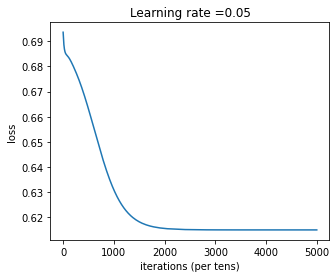

In [0]:
X = train_in.T
Y = train_out.T

nn_model.train()
training_losses = []
for epoch in range(0,epochs):
  model_output = nn_model(X.float())
  loss = loss_func(model_output,Y.float())
  training_losses.append(loss)

  optim.zero_grad()
  loss.backward()
  optim.step()
  if epoch%100==0:
    print("Epoch: {}, Training Loss: {}".format(epoch,loss.item()))

print("Training Loss: "+str(training_losses[-1].float()))

plt.plot(np.squeeze(training_losses))
plt.ylabel('loss')
plt.xlabel('iterations (per tens)')
plt.title("Learning rate =" + str(learning_rate))
plt.show()

In [0]:
test_in_re = test_in.T
test_out_re = test_out.T
epoch = 5000
nn_model.eval()
test_loss = []

# for epoch in range(0,epoch):
#   with torch.no_grad():
#     model_out = nn_model(test_in.float())
#     loss = loss_func(model_out,test_out.float())
#     test_loss.append(loss.item())

test_predict_re = nn_model(test_in_re.float())
loss = loss_func(test_predict_re,test_out_re.float())
test_pred_re = test_predict_re.detach().numpy()
test_output_re = test_out_re.detach().numpy()
test_pred_re[test_pred_re > 0.5] = 1
test_pred_re[test_pred_re < 0.5] = 0

accuracy = np.sum((test_pred_re==test_output_re)/test_in_re.shape[0])

print("Testing Accuracy: "+str(accuracy))

Testing Accuracy: 0.8009950248756217


**Experimentation:** \\


* Learning Rate = 0.005, Momentum = 0, Epochs = 8000, Weight Decay = 0 Accuracy = 0.83
* Learning Rate = 0.005, Momentum = 0.9, Epochs = 8000, Weight Decay = 0.01, Accuracy=  0.82
* Learning Rate = 0.001, Momentum = 0.5, Epochs = 8000, Weight Decay =0.01, Accuracy= 0.8
* Learning Rate = 0.001, Momentum = 0.9, Epochs = 5000, Weight Decay = 0.05 Accuracy = 0.82
* Learning Rate = 0.001, Momentum = 0.9, Epochs = 5000, Weight Decay = 0.1 Accuracy = 0.82
* Learning Rate = 0.01, Momentum = 0.2, Epochs = 5000, Weight Decay = 0.05. Accuracy = 0.82
* Learning Rate = 0.01, Momentum = 0.5, Epochs = 5000, Weight Decay = 0.1, Accuracy = 0.8
* Learning Rate = 0.01, Momentum = 0.9 , Epochs = 5000, Weight Decay = 0.5 , Accuracy = 0.68
* Learning Rate = 0.01, Momentum = 0.9, Epochs = 5000, Weight Decay = 0.1 Accuracy = 0.47
* Learning Rate = 0.05, Momentum = 0.9, Epochs = 5000, Weight Decay = 0.2, Accuracy = 0.8
* Learning Rate = 0.05, Momentum = 0.2, Epochs = 5000, Weight Decay = 0.2, Accuracy = 0.8
* Learning Rate = 0.005, Momentum = 0.9, Weight Decay = 0.05, Epochs = 5000, Accuracy = 0.825
* Learning Rate = 0.005, Momentum = 0.9, Weight Decay = 0.1, Epochs = 5000, Accuracy = 0.80
* Learning Rate = 0.001, Momentum = 0.9, Weight Decay = 0.01, Epochs = 5000, Accuracy = 0.825
* Learning Rate = 0.005, Momentum = 0.9, Weight Decay = 0.01, Epochs = 5000, Accuracy = 0.825

---
While some were overfitting, some underfitting. The optimum result were seen when, \\
LR = 0.001, Momentum = 0.9, Weight Decay = 0.01, Epochs = 5000 \\
LR = 0.005, Momentum = 0.9, Weight Decay = 0.01, Epochs = 5000 \\
LR = 0.005, Momentum = 0, Weight Decay = 0, Epochs = 8000
